In [1]:
import pandas as pd
from typing import Optional
from dataclasses import dataclass, asdict
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import helpers

helpers.period_days = 7

In [2]:
@dataclass
class TaskRawData:
    process_name: str
    task_name: str
    owner_name: str
    assigner: Optional[str]
    start_time: datetime
    end_time: Optional[datetime]
    due_time: datetime
    priority: int
    var_count: int
    
    def get_as_row(self, column_names):
        row = []
        for col in column_names:
            row.append(self.__getattribute__(col))
        return row
    
    @classmethod
    def collumn(cls):
        return tuple(cls.__dataclass_fields__.keys())
    


In [3]:

# helpers.get_task_dates(30, 10)
# helpers.generate_random_val(100, 15)
process_name_1 = "Заказ товара"
task_name_1 = "проверка склада"
task_priority_1 = 50
task_var_count_1 = 1
task_due_minutes_1 = 60
owner = "BOSS"
assigner_list_1 = [{"name":"Соня", "dev_pos":(10, None)},
                   {"name":"Миша", "dev_pos":(10, True)},
                   {"name":"Глеб", "dev_pos":(5, None)}]



In [4]:
task_list = []
for i in range(300):
    assigner = random.choice(assigner_list_1)
    start, due, end = helpers.get_task_dates(task_due_minutes_1, *assigner['dev_pos'])
    task_list.append(TaskRawData(process_name_1, task_name_1, owner, assigner['name'], start, end, due, task_priority_1, task_var_count_1))
    

In [5]:
process_name_2 = "закупка"
task_name_2 = "Оформить заявку"
task_priority_2 = 50
task_var_count_2 = 3
task_due_minutes_2 = 60
owner = "BOSS"
assigner_list_2 = [{"name":"Соня", "dev_pos":(10, None)},
                   {"name":"Миша", "dev_pos":(15, False)},
                   {"name":"Глеб", "dev_pos":(3, True)}]

In [6]:
task_list_2 = []
for i in range(300):
    assigner = random.choice(assigner_list_2)
    start, due, end = helpers.get_task_dates(task_due_minutes_2, *assigner['dev_pos'])
    task_list_2.append(TaskRawData(process_name_2, task_name_2, owner, assigner['name'], start, end, due, task_priority_2 + (10 if random.random()>0.8 else 0), task_var_count_2))
    

##############

In [7]:
process_name_3 = "информирование"
task_name_3 = "обзвон покупателей"
task_priority_3 = 45
task_var_count_3 = 8
task_due_minutes_3 = 67
owner = "BOSS"
assigner_list_3 = [{"name":"Соня", "dev_pos":(13, True)},
                   {"name":"Миша", "dev_pos":(8, False)},
                   {"name":"Глеб", "dev_pos":(20, None)}]

In [8]:
task_list_3 = []
for i in range(1000):
    assigner = random.choice(assigner_list_3)
    start, due, end = helpers.get_task_dates(task_due_minutes_3, *assigner['dev_pos'])
    task_list_3.append(TaskRawData(process_name_3, task_name_3, owner, assigner['name'], start, end, due, task_priority_3 + (10 if random.random()>0.8 else 0), task_var_count_3))
    

In [9]:
process_name_4 = "договор"
task_name_4 = "оформление договора"
task_priority_4 = 60
task_var_count_4 = 12
task_due_minutes_4 = 10
owner = "BOSS"
assigner_list_4 = [{"name":"Соня", "dev_pos":(3, None)},
                   {"name":"Миша", "dev_pos":(7, True)},
                   {"name":"Глеб", "dev_pos":(10, False)}]

In [10]:
task_list_4 = []
for i in range(1000):
    assigner = random.choice(assigner_list_4)
    start, due, end = helpers.get_task_dates(task_due_minutes_4, *assigner['dev_pos'])
    task_list_4.append(TaskRawData(process_name_4, task_name_4, owner, assigner['name'], start, end, due, task_priority_4 + (10 if random.random()>0.8 else 0), task_var_count_4))
    

################

In [11]:
collumn_names = TaskRawData.collumn()

In [12]:
df = pd.DataFrame.from_records([asdict(task) for task in (*task_list, *task_list_2, *task_list_3, *task_list_4)])
df

,process_name,task_name,owner_name,assigner,start_time,end_time,due_time,priority,var_count
0,Заказ товара,проверка склада,BOSS,Глеб,2021-08-31 17:51:58,2021-08-31 18:51:18.302065,2021-08-31 18:51:58,50,1
1,Заказ товара,проверка склада,BOSS,Глеб,2021-09-02 10:32:43,2021-09-02 11:31:54.215308,2021-09-02 11:32:43,50,1
2,Заказ товара,проверка склада,BOSS,Миша,2021-08-29 09:20:52,2021-08-29 10:22:07.256957,2021-08-29 10:20:52,50,1
3,Заказ товара,проверка склада,BOSS,Соня,2021-08-29 09:18:35,2021-08-29 10:15:47.328339,2021-08-29 10:18:35,50,1
4,Заказ товара,проверка склада,BOSS,Миша,2021-08-29 14:31:57,2021-08-29 15:33:47.138890,2021-08-29 15:31:57,50,1
...,...,...,...,...,...,...,...,...,...
2595,договор,оформление договора,BOSS,Глеб,2021-08-29 09:55:43,2021-08-29 10:04:55.758978,2021-08-29 10:05:43,70,12
2596,договор,оформление договора,BOSS,Соня,2021-09-04 13:03:38,2021-09-04 13:13:46.546510,2021-09-04 13:13:38,60,12
2597,договор,оформление договора,BOSS,Миша,2021-08-31 18:39:09,2021-08-31 18:49:32.293185,2021-08-31 18:49:09,60,12
2598,договор,оформление договора,BOSS,Соня,2021-09-04 07:18:01,2021-09-04 07:27:59.346816,2021-09-04 07:28:01,60,12


In [13]:
# start day of week
df['start_dow'] = df['start_time'].apply(lambda x: x.date().weekday())
df['start_is_weekend'] = df['start_time'].apply(lambda x: 1 if x.date().weekday() in (5, 6) else 0)
# due day of week
df['due_dow'] = df['due_time'].apply(lambda x: x.date().weekday())
df['due_is_weekend'] = df['due_time'].apply(lambda x: 1 if x.date().weekday() in (5, 6) else 0)
# df[df.start_is_weekend == 0]

In [14]:
elapsed = []
other_task_on_start = []
other_task_on_end = []
expired = []
for row_index, row in df.iterrows():
    task_start = row.start_time
    task_end = row.end_time
    assigner = row.assigner
    task_start = df[(df.assigner == assigner) & (df.start_time < task_start) & (df.end_time > task_start)].shape[0]
    other_task_on_start.append(task_start)
# other_task_on_end нельзя использовать мы ищем end по сути
#     other_task_on_end.append(df[(df.assigner == assigner) & (df.start_time < task_end) & (df.end_time > task_end)].shape[0])
#     print(other_task_on_start.shape[0], other_task_on_end.shape[0])
    elapsed.append(int((row.end_time - row.start_time).total_seconds()*(1+task_start/10)))
    
#     expired.append(row.end_time > row.due_time)

df['elapsed'] = elapsed
df['other_task_on_start'] = other_task_on_start
# df['other_task_on_end'] = other_task_on_end
# df['expired'] = expired



In [15]:
# кодируем категориальные признаки
categorial_sign = ['process_name','task_name', 'owner_name','assigner', 'start_dow', 'due_dow']
for sign in categorial_sign:
    tmp = pd.get_dummies(df[sign], prefix=sign)
    df = pd.concat([df,tmp], axis=1)

tmp

# for naming_col in ["assigner", "task_name"]:
#     naming_df = df[naming_col]# creating instance of labelencoder
    
#     labelencoder = LabelEncoder()# Assigning numerical values and storing in another column
#     df[f'{naming_col}_number'] = labelencoder.fit_transform(naming_df)
# #     df
# df.columns.values

,due_dow_0,due_dow_1,due_dow_2,due_dow_3,due_dow_4,due_dow_5,due_dow_6
0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
2595,0,0,0,0,0,0,1
2596,0,0,0,0,0,1,0
2597,0,1,0,0,0,0,0
2598,0,0,0,0,0,1,0


вроде более менее преобразованные данные получились
необходимо убрать лишнее, это незакодированные категориальные признаки и возможно стоит убрать необработанное время
целевой признак затраченное время(elapsed)

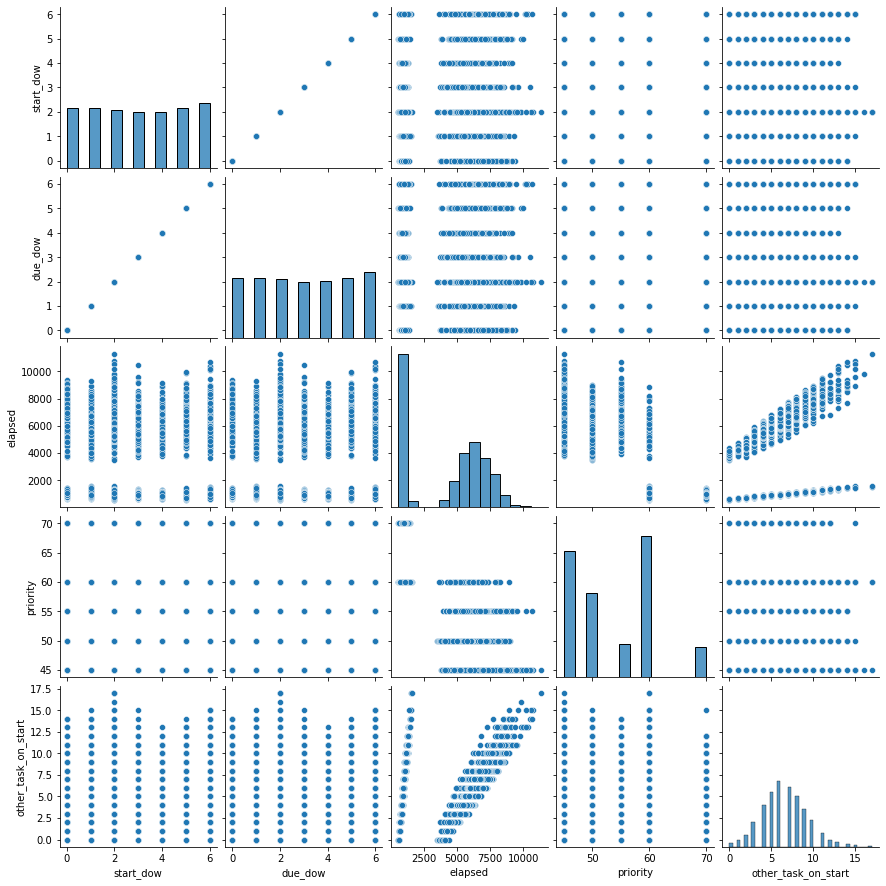

In [16]:
cols = ['start_dow', 'due_dow', 'elapsed', 'priority', 'other_task_on_start']
sns_plot = sns.pairplot(df[cols])

In [17]:
need_drop = ["process_name", "task_name", "owner_name", "assigner", "end_time", "start_time", "due_time", "start_dow", "due_dow"]
# "task_name_number", "assigner_number"
df = df.drop(columns=need_drop)

In [18]:
corr_matrix = df.corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
# sol[:30]

т.к. корреляция признаков сильная, попробуем использовать Ridge  и Lasso регрессии

In [19]:

Y = df.elapsed.values
X = df.drop(columns=['elapsed'])


In [20]:
# X.head()
# X

In [21]:
from sklearn.linear_model import RidgeCV, LassoCV, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, ShuffleSplit


scaler = StandardScaler()
scaler.fit(X) 


X_scaled = scaler.transform(X)
ridge = RidgeCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000])
# lasso = Lasso(random_state=42)
lasso = LassoCV(random_state=42)


skf = StratifiedKFold(n_splits=5)

for train_index, test_index in skf.split(X_scaled, Y):
    print("######")
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    ridge_mse = mean_squared_error(y_test, y_pred)
    ridge_mae = mean_absolute_error(y_test, y_pred)
    ridge_me = max_error(y_test, y_pred)
    print("ridge_score", ridge.score(X_test, y_test))
    print("ridge", ridge_mse, "|", ridge_mae, ridge_mae/y_test.mean(), ridge_me, y_test.mean())
    

    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    lasso_mse = mean_squared_error(y_test, y_pred)
    lasso_mae = mean_absolute_error(y_test, y_pred)
    lasso_me = max_error(y_test, y_pred)
    print("lasso_score", lasso.score(X_test, y_test))
    print("lasso", lasso_mse, "|", lasso_mae, lasso_mae/y_test.mean(), lasso_me, y_test.mean())

/home/roman/projects/jupiter/venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


######
ridge_score 0.9682877747830143
ridge 256735.0883775844 | 390.9963690238958 0.08962280311118401 2095.3160305579986 4362.6884615384615
lasso_score 0.9681963674457598
lasso 257475.10175248448 | 391.2923715622967 0.08969065176483197 2075.458181767971 4362.6884615384615
######
ridge_score 0.966107251734001
ridge 256623.6476108018 | 388.24343172412193 0.09045239710145249 1820.7518338123446 4292.240384615385
lasso_score 0.9663572173548542
lasso 254730.99821874846 | 387.74322341501687 0.0903358592880304 1821.627447279032 4292.240384615385
######
ridge_score 0.9668958818616723
ridge 257648.7897113489 | 394.0209278221937 0.09098772142553806 1807.3315724340318 4330.484615384616
lasso_score 0.9670191332195269
lasso 256689.5264846762 | 393.56196018673194 0.09088173614300611 1818.0105356425083 4330.484615384616
######
ridge_score 0.9684575115567052
ridge 259242.55692556666 | 414.4569209658621 0.09430076069001005 1655.723878984194 4395.053846153846
lasso_score 0.9684016000477706
lasso 259702.0

 Для приемлемых моделей предполагается, что коэффициент детерминации должен быть хотя бы не меньше 50 % (в этом случае коэффициент множественной корреляции превышает по модулю 70 %). Модели с коэффициентом детерминации выше 80 % можно признать достаточно хорошими (коэффициент корреляции превышает 90 %). Значение коэффициента детерминации 1 означает функциональную зависимость между переменными.
 
У нас на синтетических данных явно прослеживается зависимость от количвества других задач на время начала задачи и приоритета задачи, поэтому коэфициент детерминации высокий

In [22]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
ridge_cvs = cross_val_score(ridge, X_scaled, Y, cv=cv)
lasso_cvs = cross_val_score(lasso, X_scaled, Y, cv=cv)
print(ridge_cvs)
print(lasso_cvs)
print(ridge_cvs.mean(), lasso_cvs.mean())

[0.96701538 0.96707708 0.9659768  0.96924047 0.96764701]
[0.96719185 0.9671563  0.96596182 0.96916584 0.967738  ]
0.967391349972831 0.967442760173209


In [23]:
X.columns

Index(['priority', 'var_count', 'start_is_weekend', 'due_is_weekend',
       'other_task_on_start', 'process_name_Заказ товара',
       'process_name_договор', 'process_name_закупка',
       'process_name_информирование', 'task_name_Оформить заявку',
       'task_name_обзвон покупателей', 'task_name_оформление договора',
       'task_name_проверка склада', 'owner_name_BOSS', 'assigner_Глеб',
       'assigner_Миша', 'assigner_Соня', 'start_dow_0', 'start_dow_1',
       'start_dow_2', 'start_dow_3', 'start_dow_4', 'start_dow_5',
       'start_dow_6', 'due_dow_0', 'due_dow_1', 'due_dow_2', 'due_dow_3',
       'due_dow_4', 'due_dow_5', 'due_dow_6'],
      dtype='object')

## predict example
берем задачу и преобразуем под вид, который принимает модель

In [24]:
task_example = task_list[0]
task_example

TaskRawData(process_name='Заказ товара', task_name='проверка склада', owner_name='BOSS', assigner='Глеб', start_time=datetime.datetime(2021, 8, 31, 17, 51, 58), end_time=datetime.datetime(2021, 8, 31, 18, 51, 18, 302065), due_time=datetime.datetime(2021, 8, 31, 18, 51, 58), priority=50, var_count=1)

In [25]:
input_other_task_on_start = 5
assigner = "Миша"

# input_data = {"priority": task_example.priority,
#  "var_count": task_example.var_count,

#  "start_is_weekend": 1 if task_example.start_time.date().weekday in (5, 6) else 0,
#  "due_dow": task_example.due_time.date().weekday,
#  "due_is_weekend": 1 if task_example.due_time.date().weekday else 0,
#  "other_task_on_start": other_task_on_start,
#  f"process_name_{task_example.process_name}": 1,
#  f"task_name_{task_example.task_name}": 1,
#  f"assigner_{assigner}": 1,
#  f"owner_name_{task_example.owner_name}": 1,
#  f"start_dow_{task_example.start_time.date().weekday()}": 1,
#  f"due_dow_{task_example.start_time.date().weekday()}": 1
# }
# input_data

In [26]:
assigner = "Миша"
task_example.assigner = assigner
task_example.end_time = np.nan
input_df = pd.DataFrame.from_records([asdict(task_example)])
input_df

,process_name,task_name,owner_name,assigner,start_time,end_time,due_time,priority,var_count
0,Заказ товара,проверка склада,BOSS,Миша,2021-08-31 17:51:58,NaN,2021-08-31 18:51:58,50,1


In [27]:
input_df['start_dow'] = input_df['start_time'].apply(lambda x: x.date().weekday())
input_df['start_is_weekend'] = input_df['start_time'].apply(lambda x: 1 if x.date().weekday() in (5, 6) else 0)
# due day of week
input_df['due_dow'] = input_df['due_time'].apply(lambda x: x.date().weekday())
input_df['due_is_weekend'] = input_df['due_time'].apply(lambda x: 1 if x.date().weekday() in (5, 6) else 0)

In [28]:
input_df['other_task_on_start'] = input_other_task_on_start

In [29]:
for sign in categorial_sign:
    tmp = pd.get_dummies(input_df[sign], prefix=sign)
    input_df = pd.concat([input_df,tmp], axis=1)
input_df

,process_name,task_name,owner_name,assigner,start_time,end_time,due_time,priority,var_count,start_dow,start_is_weekend,due_dow,due_is_weekend,other_task_on_start,process_name_Заказ товара,task_name_проверка склада,owner_name_BOSS,assigner_Миша,start_dow_1,due_dow_1
0,Заказ товара,проверка склада,BOSS,Миша,2021-08-31 17:51:58,NaN,2021-08-31 18:51:58,50,1,1,0,1,0,5,1,1,1,1,1,1


In [35]:
input_df = input_df.drop(columns=need_drop)

In [36]:
input_vals = []
for i, col in enumerate(X.columns):
    if col not in input_df:
        input_vals.append(0)
    else:
        input_vals.append(input_df[col].values[0])

input_vals = np.array(input_vals).reshape(1, -1)


input_vals_scaled = scaler.transform(input_vals)


In [42]:
print(ridge.predict(input_vals_scaled))

[5460.84557159]
